<a href="https://colab.research.google.com/github/LokiAndere/After_MIARFID/blob/main/test_divisor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt
np.set_printoptions(suppress = True)

In [23]:
def draw(im):
    im = np.repeat(im[..., None], 3, axis = 2)
    _, ax = plt.subplots(figsize = (12, 12), dpi = 72)
    #ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.xaxis.set_ticks_position('top')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.imshow(im)
    plt.show()

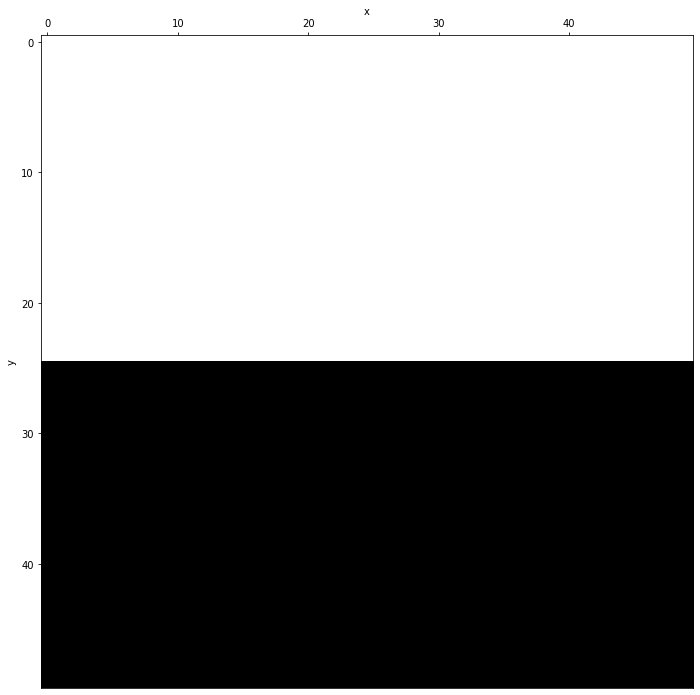

In [24]:
size = 50
hs = size // 2
test = np.full((size, size), 1, dtype = np.single)
test[hs : , ...] = 0
draw(test)

In [7]:
sobel = np.array(
    [
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
    ],
    dtype = np.single
)

divs = [1, 8, 6, 4]

sobs = [sobel/d for d in divs]

In [8]:
res = [signal.convolve2d(test, sobel/d, mode='valid') for d in divs]

In [9]:
print(res[0].shape)

for r in res:
    print(r[:,0])
    print()

(48, 48)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.
 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.5 0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]

[0.00000001 0.00000001 0.00000001 0.00000001 0.00000001 0.00000001
 0.00000001 0.00000001 0.00000001 0.00000001 0.00000001 0.00000001
 0.00000001 0.00000001 0.00000001 0.00000001 0.00000001 0.00000001
 0.00000001 0.00000001 0.00000001 0.00000001 0.00000001 0.6666667
 0.6666667  0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


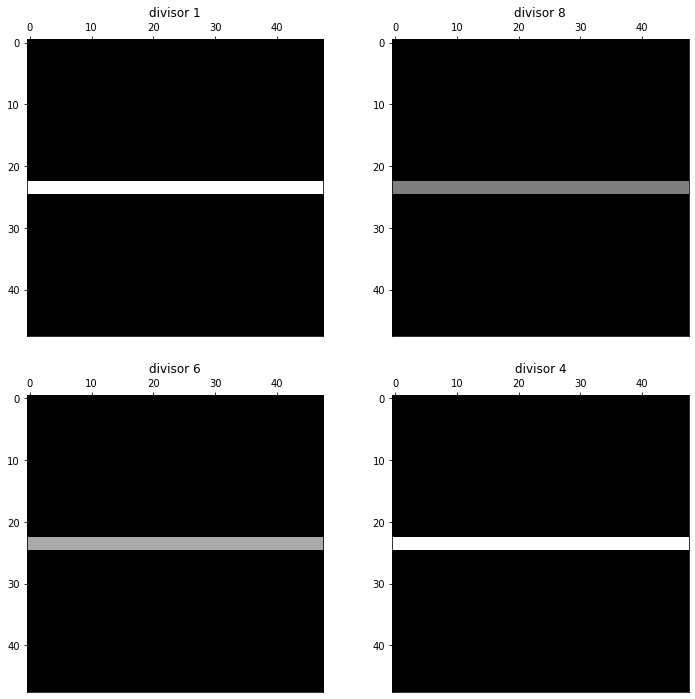

In [10]:
_, axs = plt.subplots(2, 2, figsize = (12, 12), dpi = 72)
for im, div, ax in zip(res, divs, axs.flatten()):
    im = np.repeat(im[..., None], 3, axis = 2)
    im = np.around(im, decimals=2)
    ax.xaxis.tick_top()
    ax.set_title(f'divisor {div}')
    ax.imshow(im)
    # ax.fmt_xdata = lambda x: f"{x:.0f}"
    # ax.fmt_ydata = lambda x: "{0:f}".format(x)
    # ax.format_coord = lambda x, y: "({0:f}, ".format(y) +  "{0:f})".format(x)
    ax.format_coord = lambda x,y: f"x={x:.0f}, y={y:.0f}"
    # ax.format_coord = lambda x,y: f"x={np.format_float_positional(x)}, y={np.format_float_positional(y)}"
plt.show()